In [ ]:
#Import important libraries
import numpy as np     
import pandas as pd   
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
#Read the training CSV dataset as dataframe
df_train = pd.read_csv("/content/drive/MyDrive/AI & DA Materials/Artificial Intelligence and Data Science - OIM7507-B/Coursework/msc_training_dataset.csv")
df_train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [ ]:
#Check the number of rows and columns
df_train.shape

(3000, 12)

In [ ]:
#Familiarizing with the training dataset
df_train.head()
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [ ]:
#Check for missing values in training data
missing_values_training_data = df_train.isna().sum()
print(missing_values_training_data)

room            0
bathroom        0
kitchen         0
french_door     0
backyard        0
furnished       0
green_paint     0
solar_power     0
woodfloor       0
qlm_security    0
club_access     0
price           0
dtype: int64


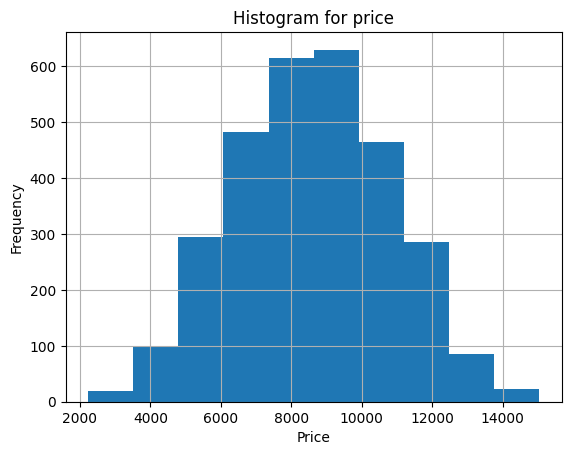

In [ ]:
#Examining the distribution of the dataset to identify trends, outliers of potential data quality issues
plt.title('Histogram for price')
df_train['price'].hist()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

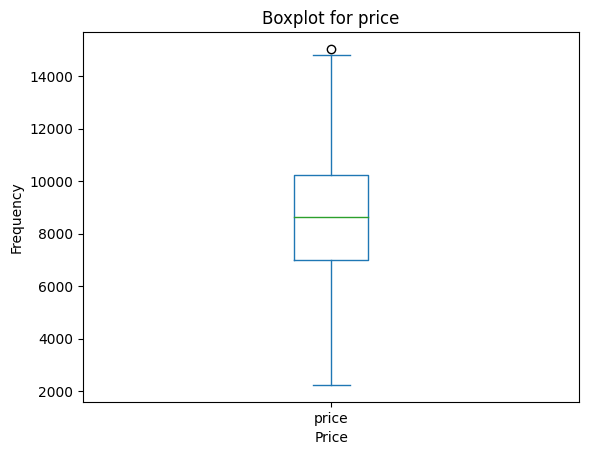

In [ ]:
plt.title('Boxplot for price')
df_train['price'].plot(kind='box')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

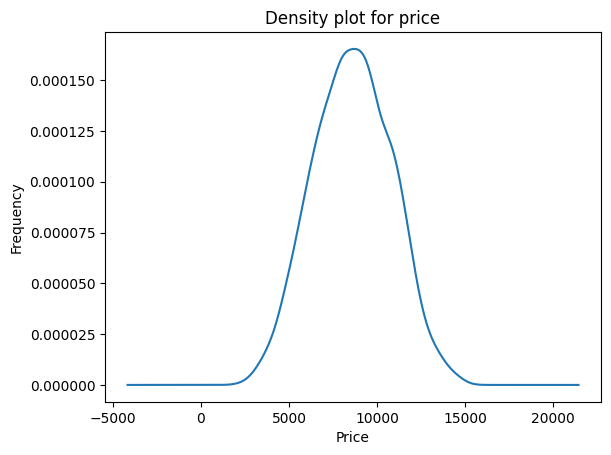

In [ ]:
plt.title('Density plot for price')
df_train['price'].plot(kind='density')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Read the testing CSV dataset as dataframe
df_test = pd.read_csv("/content/drive/MyDrive/AI & DA Materials/Artificial Intelligence and Data Science - OIM7507-B/Coursework/msc_testing_dataset.csv")
df_test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [ ]:
#Check the number of rows and columns
df_test.shape

(999, 12)

In [ ]:
#Check for missing values in test data
missing_values_testing_data = df_test.isna().sum()
print(missing_values_testing_data)

room            0
bathroom        0
kitchen         0
french_door     0
backyard        0
furnished       0
green_paint     0
solar_power     0
woodfloor       0
qlm_security    0
club_access     0
price           0
dtype: int64


In [ ]:
#Familiarizing with the training dataset
df_test.head()
df_test.info()
df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          999 non-null    int64
 1   bathroom      999 non-null    int64
 2   kitchen       999 non-null    int64
 3   french_door   999 non-null    int64
 4   backyard      999 non-null    int64
 5   furnished     999 non-null    int64
 6   green_paint   999 non-null    int64
 7   solar_power   999 non-null    int64
 8   woodfloor     999 non-null    int64
 9   qlm_security  999 non-null    int64
 10  club_access   999 non-null    int64
 11  price         999 non-null    int64
dtypes: int64(12)
memory usage: 93.8 KB


,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000
mean,3.019019,1.491491,1.496496,1.959960,0.510511,0.474474,0.523524,0.49049,0.501502,0.500501,0.495495,8601.863864
std,1.413731,0.500178,0.500238,0.809759,0.500140,0.499598,0.499696,0.50016,0.500248,0.500250,0.500230,2217.898743
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2688.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7068.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,8608.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,10128.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14318.000000


In [ ]:
#Separate the features (X) and target variable (Y) for the training data
X_train = df_train.drop('price', axis=1)
y_train = df_train['price']

In [ ]:
#Separate the features (X) and target variable (Y) for the testing data
X_test = df_test.drop('price', axis=1)
y_test = df_test['price']

In [ ]:
#Confirm the shape of the training and testing dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3000, 11)
(3000,)
(999, 11)
(999,)


In [ ]:
#Using  the Linear Regression model
linear_reg_model = LinearRegression()

In [ ]:
#Train the model
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Use the trained model to predict the test data
linear_y_pred = linear_reg_model.predict(X_test)

In [ ]:
#Output of the linear model test data
linear_y_pred 

array([ 5055.,  7645., 11305.,  8845., 11165., 11375., 11735.,  6835.,
        7815.,  5895.,  9095.,  8295.,  6695., 11305.,  7205.,  9165.,
        8775., 12745.,  9745.,  6655.,  9325.,  7785.,  7075.,  4315.,
        9965.,  6855.,  7335.,  8895.,  6325.,  9695.,  6645., 10305.,
       10485.,  8195.,  7565., 10355.,  9475., 11115.,  9765., 12825.,
        6295.,  5125.,  9825.,  8895., 11715.,  6205.,  4095., 11475.,
        9565.,  5535., 11455., 10395.,  4125.,  7735., 13055.,  9595.,
        6445.,  8365., 10155.,  7835.,  8275., 14305.,  7075.,  8435.,
       12625.,  7095., 11435., 10555., 10095.,  5535.,  8235., 12095.,
        4215.,  5865.,  9355.,  9245.,  7065., 11625., 10855., 10825.,
        8785.,  7355., 11865.,  8315., 11805.,  5945.,  8775.,  8275.,
        7165.,  8245.,  7575., 11925., 11965.,  7975.,  6645., 10795.,
       11235.,  8195.,  9355.,  7445.,  7235.,  8935.,  4575.,  9675.,
        5735.,  5075., 10645.,  9705.,  8605., 12515.,  8165.,  6105.,
      

In [ ]:
#Get the mean absolute error for the linear model
mean_absolute_error(y_test, linear_y_pred )

13.000000000000469

In [ ]:
#Get the R-squared score for the linear model
print(linear_reg_model.score(X_train, y_train))

1.0


**It is clear that the Linear Regression model is overfitting. Considering this issue, the Random Forest algorithm will be employed for prediction due to its inherent robustness against overfitting.**

In [ ]:
#Using Randform Forest Algorithm
random_forest_model = RandomForestRegressor(n_estimators=100)

In [ ]:
#Train the model
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#Use the trained model to predict the test data
y_pred = random_forest_model.predict(X_test)

In [ ]:
#Output of the test data
y_pred

array([ 5318.1,  7712.3, 11515.4,  8793.2, 11075.2, 11521.8, 11726.1,
        7006.9,  7818.4,  5876.8,  9188.6,  8499.4,  7053.2, 11295.2,
        7326. ,  9486.1,  8934.1, 12755.1,  9881.1,  7041.4,  8917.9,
        7455.9,  7037.2,  4202. , 10098.1,  7361.6,  7296.1,  9051.9,
        6818.6,  9284.6,  6626. , 10051.3, 10539.9,  8267.7,  7752.4,
       10251.7,  9229. , 11078.1,  9394. , 13274.7,  6641.1,  5275.3,
        9864.8,  8937.6, 11564.2,  6171.5,  4355.5, 11414.7,  9619. ,
        5368.8, 11509.8, 10533.9,  4850.9,  7927.2, 13601. ,  9721.6,
        6157.2,  8511.4, 10026.6,  7784.3,  7878.8, 13516.7,  7354.2,
        8474.3, 12589.4,  7084.6, 11327. , 10536.2, 10006.3,  5534. ,
        8160.1, 12134.4,  4172.4,  6223.9,  9548. ,  8628.9,  6893.3,
       11162.4, 10962.2, 10684.1,  8826.4,  7474.3, 12023.1,  8116.7,
       11722.3,  6255.9,  8746.1,  8335.4,  6900.3,  8341.8,  7573.6,
       12101.1, 11762.2,  7932.2,  6626. , 11053.6, 11072.8,  8270.1,
        9175.6,  733

In [ ]:
#Put the predicted as a new column in the test dataset
df_test['predicted_price'] = y_pred

In [ ]:
#Display the output of the new test dataset 
df_test

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,predicted_price
0,1,1,1,3,0,0,1,1,0,1,0,5068,5318.1
1,5,1,1,2,0,0,0,0,0,1,1,7658,7712.3
2,5,1,1,3,0,0,0,1,1,1,1,11318,11515.4
3,4,2,2,1,0,1,1,0,0,1,0,8858,8793.2
4,5,2,1,1,0,1,1,1,0,0,1,11178,11075.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0,10088,9839.6
995,5,1,2,3,1,1,0,0,0,0,0,9788,9777.3
996,3,2,2,1,0,1,1,1,0,1,0,9388,8842.1
997,3,2,1,1,1,0,0,1,1,0,0,8528,8625.9


In [ ]:
#Get the R-squared score
print(random_forest_model.score(X_train, y_train))

0.9984914915019885


In [ ]:
#Get the mean absolute error 
mean_absolute_error(y_test, y_pred)

172.45405405405404

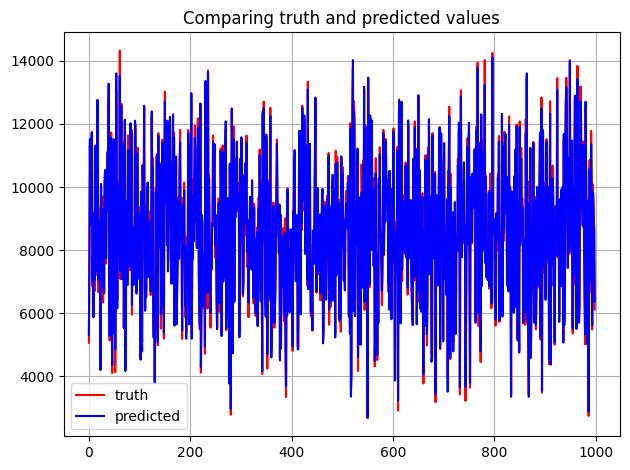

In [ ]:
#Plot and compare the training and predicted data in a chart
def make_plot(truth, prediction):
  plt.plot(truth, color="red", label="truth")
  plt.plot(prediction, color="blue", label="predicted")
  plt.legend()
  plt.grid()
  plt.title("Comparing truth and predicted values")
  plt.tight_layout()
  plt.show()

make_plot(y_test, y_pred)

Feature importances
room            0.431157
bathroom        0.004716
kitchen         0.011252
french_door     0.008997
backyard        0.014494
furnished       0.197309
green_paint     0.006637
solar_power     0.114110
woodfloor       0.176399
qlm_security    0.008960
club_access     0.025969
dtype: float64


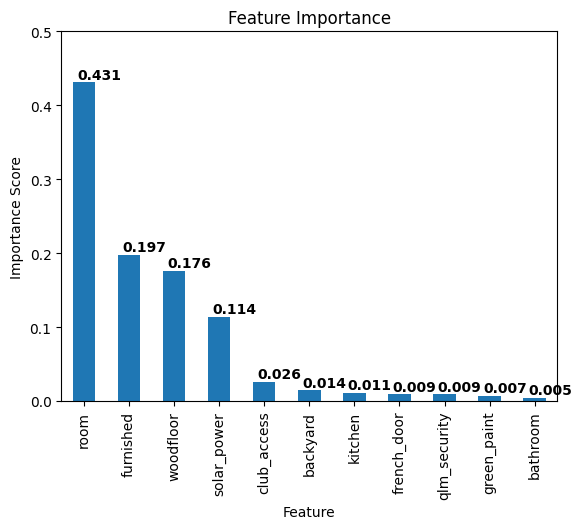

In [ ]:
# Obtain the feature importances for the model
feature_importances = pd.Series(random_forest_model.feature_importances_, index=X_train.columns)
print('Feature importances')
print(feature_importances)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Plot the sorted feature importances
ax = sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.ylim(0, 0.5)

# Add labels to the bars
for i, v in enumerate(sorted_feature_importances):
    ax.text(i - 0.15, v + 0.005, str(round(v, 3)), color='black', fontweight='bold')

plt.show()
